<a href="https://colab.research.google.com/github/Veda-Vardhan-Reddy/IIITH-AIML_Labs_and_Projects_2025/blob/main/STP_Module_01_Lab_04_Transforming_data_using_linear_algebra_by_Om.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transforming data using linear algebra

Module 1, Lab 4

Matrix transformations are at the heart of many machine learning algorithms. In this lab, we'll visualize the effect of some simple transformations on a unit square and then visualize it using the MNIST dataset. We also see what data normalization means and how it can help in improving the accuracy of machine learning models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
# You don't need to understand these functions


def plotGrid(transform, unit, linestyle=":", fig=None, ax=None):
    lim1 = -100
    lim2 = 100

    def mat2xy(start, end):
        if len(start.shape) == 1:
            start = np.expand_dims(start, 0)
            end = np.expand_dims(end, 0)
        nan = np.ones(len(start)) * np.nan
        x = np.stack((start[:, 0], end[:, 0], nan)).T.reshape(-1)
        y = np.stack((start[:, 1], end[:, 1], nan)).T.reshape(-1)
        return x, y

    def parallellines(axis, addend, lines, unit):
        addend = np.repeat(np.expand_dims(addend, 0), lines * 2, 0)
        unit = np.expand_dims(np.arange(-lines, lines) * unit, 1)
        unit = unit - lines
        addend = addend * unit
        lines = np.expand_dims(axis, 0) + addend
        return np.concatenate((lines, lines * -1))

    if fig is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    transform = transform.astype(float)
    xaxis = transform[0]
    yaxis = transform[1]

    # plot lines parallel to the x axis
    lines1 = parallellines(xaxis * lim1, yaxis, 100, unit)
    lines2 = parallellines(xaxis * lim2, yaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot x axis
    x, y = mat2xy(xaxis * lim1, xaxis * lim2)
    plt.plot(x, y, linestyle, color="#440077")

    # plot  lines parallel to the y axis
    lines1 = parallellines(yaxis * lim1, xaxis, 100, unit)
    lines2 = parallellines(yaxis * lim2, xaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot y axis
    x, y = mat2xy(yaxis * lim1, yaxis * lim2)
    plt.plot(x, y, linestyle, color="#aa5500")

    return fig, ax


def plotData(X, y, xlabel="hole", ylabel="bound", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    for ii in range(nclasses):
        plt.scatter(X[y == ii, 0], X[y == ii, 1])
    plt.legend([str(i) for i in range(nclasses)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    lim2 = X.max()
    lim1 = X.min()
    return fig, ax

## Matrix transformations on data

Note: This lab involves a lot of matrix operations. If you are not familiar with them, please go through the resources given in class before proceeding. You can also review Khan Academy's excellent linear algebra [resources](https://www.khanacademy.org/math/linear-algebra/matrix-transformations).

A 2D coordinate system is defined by its basis vectors, i and j. Any point in this 2D space can be represented as a linear combination of these basis vectors. For example, the point (a,b) can be represented as:

$$\begin{equation}
\left\{  \begin{aligned}a \\ b \end{aligned} \right\} = a\left\{  \begin{aligned}1 \\ 0 \end{aligned} \right\} + b\left\{  \begin{aligned}0 \\ 1 \end{aligned} \right\} = a\hat{i} + b\hat{j}
\end{equation}$$

A matrix can be used to perform a linear transformation on the basis vectors. The new basis vectors $\hat{i}$ and $\hat{j}$ are given by the product of the matrix and the basis vectors of the standard coordinate system.

In the standard coordinate system (Let us call it T0), the basis vectors are

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ 0 \end{aligned} \right\}
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 1\end{aligned} \right\} \end{equation}$$

We can use any two vectors as basis vectors for a new coordinate system as long as they are not colinear. For example, let us call this new coordinate system T1:

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ -1 \end{aligned} \right\}
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 2 \end{aligned} \right\} \end{equation}$$

Suppose we have a point [a,b] in the T1 coordinate system. Its representation in the standard system T0 can be obtained by the following matrix multiplication:

$$ \begin{equation}
\left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} =
\left\{  \begin{aligned}&1 & 0 \\ -&1 & 2 \end{aligned} \right\}
\left\{  \begin{aligned}a \\ b \end{aligned} \right\}
\end{equation}$$
where the columns of the matrix are the basis vectors of T1.


Let us see this in action:


In [3]:
T0 = np.array([[1, 0], [0, 1]])
T1 = np.array([[1, 0], [-1, 2]])

data1 = np.array([5, 4])  # the data in T1 coordinate system
data0 = np.matmul(T1, data1)  # the data in T0 coordinate system

print("Data in T0 = ", data0)
print("Data in T1 = ", data1)

Data in T0 =  [5 3]
Data in T1 =  [5 4]


We can visualize this below. T0 is shown with dotted lines and T1 is shown with solid lines.

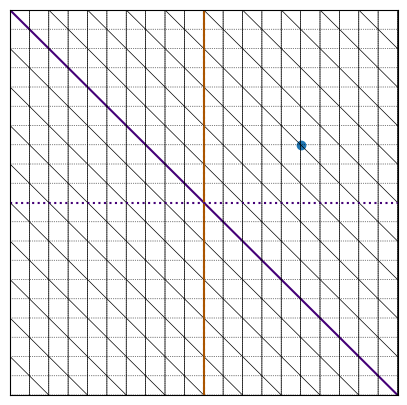

In [4]:
fig, ax = plotGrid(T1.T, 1, "-")
plotGrid(T0.T, 1, fig=fig, ax=ax)

plt.scatter(data0[0], data0[1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### What Are Basis Vectors?

Think of basis vectors as the **"rulers"** of your coordinate system. Just like measuring distance in meters vs feet changes the numbers but not the actual distance, different basis vectors represent the same point differently.

**Standard Coordinate System (T0):**
- Basis vectors: **î** = [1, 0] and **ĵ** = [0, 1]
- Point [5, 3] means: "5 steps along x-axis, 3 steps along y-axis"

**Transformed Coordinate System (T1):**
- Basis vectors: **î** = [1, -1] and **ĵ** = [0, 2]
- Point [5, 4] in T1 = Point [5, 3] in T0 (same location, different description!)

---

### Matrix Transformation Formula

Converting from T1 to T0:

$$\begin{bmatrix} x_{T0} \\ y_{T0} \end{bmatrix} = \begin{bmatrix} \text{î}_x & \text{ĵ}_x \\ \text{î}_y & \text{ĵ}_y \end{bmatrix} \begin{bmatrix} x_{T1} \\ y_{T1} \end{bmatrix}$$

Where columns of the matrix are the basis vectors of T1.

**Example:**
$$\begin{bmatrix} 5 \\ 3 \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ -1 & 2 \end{bmatrix} \begin{bmatrix} 5 \\ 4 \end{bmatrix}$$

---

Look at the coordinates of the blue dot. In T0 (dotted lines), the position is [5,3] where it is [5,4] in T1. Feel free to experiment with different data points and coordinate systems.

Remember that we can achieve the same thing by post-multiplying the transpose of the transformation matrix to the data. This will come in handy when transforming multiple data points at once:

In [5]:
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

[5 3]
[5 3]


Why is transforming data useful? Data transformations cause the distance between data points to change. This will affect distance-based algorithms such as nearest neighbour

In [6]:
# let us define 3 points in T1
A1 = np.array([3, 3])
B1 = np.array([2, -5])
C1 = np.array([1, -1])

# the corresponding points in T0:
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)


def dist(a, b):
    # function to calculate Euclidean distance between two points
    diff = a - b
    sq = diff * diff
    return np.sqrt(sq.sum())


# distance between the points in T1
print("Distance between A and B in T1 = ", dist(A1, B1))
print("Distance between B and C in T1 = ", dist(B1, C1))
print("Distance between A and C in T1 = ", dist(A1, C1))

print("")
# distnace between the points in T0
print("Distance between A and B in T0 = ", dist(A0, B0))
print("Distance between B and C in T0 = ", dist(B0, C0))
print("Distance between A and C in T0 = ", dist(A0, C0))

Distance between A and B in T1 =  8.06225774829855
Distance between B and C in T1 =  4.123105625617661
Distance between A and C in T1 =  4.47213595499958

Distance between A and B in T0 =  15.033296378372908
Distance between B and C in T0 =  9.055385138137417
Distance between A and C in T0 =  6.324555320336759


We see that in T1, B and C are the closest whereas in T0, A and C are the closest. These kinds of changes will affect the predictions returned by the nearest neighbour algorithm.

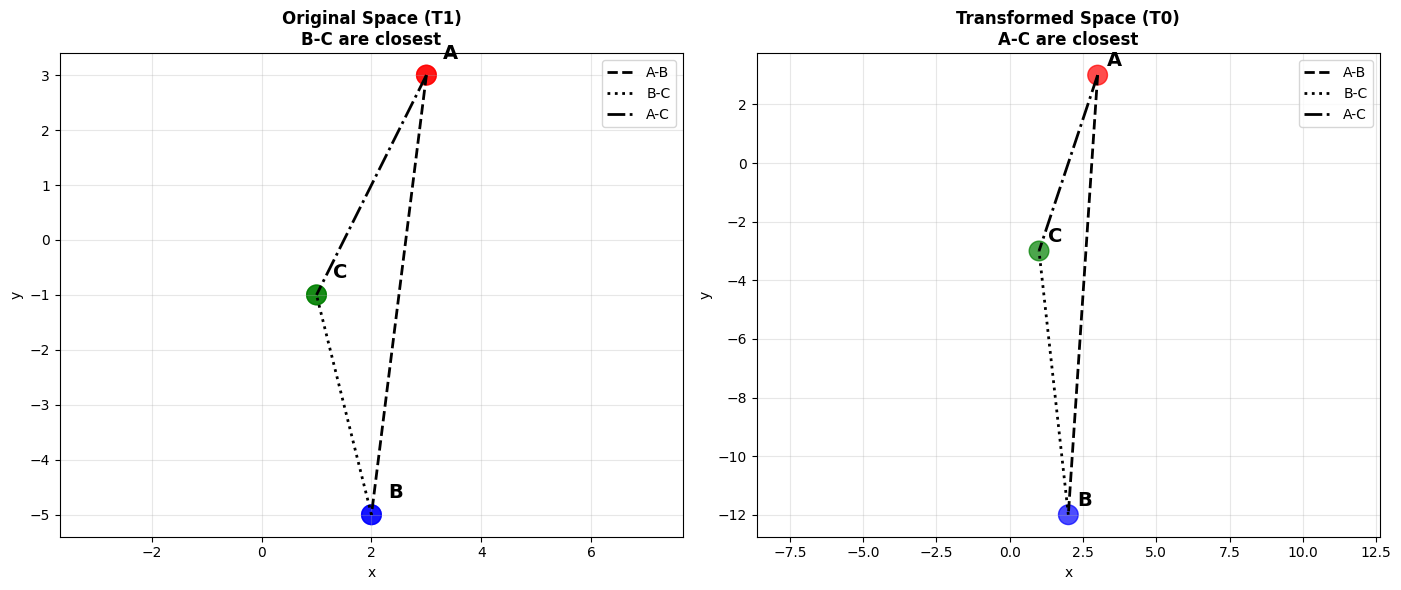

DISTANCE COMPARISON SUMMARY

In T1 Space:
  A-B distance: 8.06
  B-C distance: 4.12 ← SHORTEST
  A-C distance: 4.47

In T0 Space (after transformation):
  A-B distance: 15.03
  B-C distance: 9.06
  A-C distance: 6.32 ← SHORTEST

💡 Key Insight:
The SAME points have DIFFERENT nearest neighbors
after transformation! This directly affects K-NN predictions.


In [7]:
# Visualize how transformation changes point relationships
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot in T1 (original space)
ax1.scatter([A1[0], B1[0], C1[0]], [A1[1], B1[1], C1[1]],
            s=200, c=['red', 'blue', 'green'], alpha=0.7)
ax1.plot([A1[0], B1[0]], [A1[1], B1[1]], 'k--', linewidth=2, label='A-B')
ax1.plot([B1[0], C1[0]], [B1[1], C1[1]], 'k:', linewidth=2, label='B-C')
ax1.plot([A1[0], C1[0]], [A1[1], C1[1]], 'k-.', linewidth=2, label='A-C')
ax1.scatter([A1[0], B1[0], C1[0]], [A1[1], B1[1], C1[1]],
            s=200, c=['red', 'blue', 'green'], alpha=0.7)
ax1.text(A1[0]+0.3, A1[1]+0.3, 'A', fontsize=14, fontweight='bold')
ax1.text(B1[0]+0.3, B1[1]+0.3, 'B', fontsize=14, fontweight='bold')
ax1.text(C1[0]+0.3, C1[1]+0.3, 'C', fontsize=14, fontweight='bold')
ax1.set_title('Original Space (T1)\nB-C are closest', fontsize=12, fontweight='bold')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.axis('equal')

# Plot in T0 (transformed space)
ax2.scatter([A0[0], B0[0], C0[0]], [A0[1], B0[1], C0[1]],
            s=200, c=['red', 'blue', 'green'], alpha=0.7)
ax2.plot([A0[0], B0[0]], [A0[1], B0[1]], 'k--', linewidth=2, label='A-B')
ax2.plot([B0[0], C0[0]], [B0[1], C0[1]], 'k:', linewidth=2, label='B-C')
ax2.plot([A0[0], C0[0]], [A0[1], C0[1]], 'k-.', linewidth=2, label='A-C')
ax2.text(A0[0]+0.3, A0[1]+0.3, 'A', fontsize=14, fontweight='bold')
ax2.text(B0[0]+0.3, B0[1]+0.3, 'B', fontsize=14, fontweight='bold')
ax2.text(C0[0]+0.3, C0[1]+0.3, 'C', fontsize=14, fontweight='bold')
ax2.set_title('Transformed Space (T0)\nA-C are closest', fontsize=12, fontweight='bold')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.axis('equal')

plt.tight_layout()
plt.show()

# Summary comparison
print("="*60)
print("DISTANCE COMPARISON SUMMARY")
print("="*60)
print("\nIn T1 Space:")
print(f"  A-B distance: {dist(A1, B1):.2f}")
print(f"  B-C distance: {dist(B1, C1):.2f} ← SHORTEST")
print(f"  A-C distance: {dist(A1, C1):.2f}")

print("\nIn T0 Space (after transformation):")
print(f"  A-B distance: {dist(A0, B0):.2f}")
print(f"  B-C distance: {dist(B0, C0):.2f}")
print(f"  A-C distance: {dist(A0, C0):.2f} ← SHORTEST")

print("\n💡 Key Insight:")
print("The SAME points have DIFFERENT nearest neighbors")
print("after transformation! This directly affects K-NN predictions.")
print("="*60)

## Transformations on MNIST

Let us experiment with a subset of the MNIST dataset. We will extract two features from the database for our experiment. We will then transform the data using a transformation matrix and visualize the data in the new coordinate system. We will also see how normalization can help in improving the accuracy of the model. We will reuse previous labs code for this.

In [8]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)


def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        # for every row, add up all the rows above it.
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    """
    This function takes in a binary image and returns the pixels that are holes in the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the holes are filled in
    """
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole


def getHullPixels(img):
    """
    This function takes in a binary image and returns the pixels that are the convex hull of the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the convex hull is filled in
    """
    im1 = cumArray(img)
    # rotate and cumulate it again for differnt direction
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    return hull


def minus(a, b):
    """
    This function takes in two binary images and returns the difference between the two images
    """
    return a & ~b


def getBoundaryPixels(img):
    """
    This function takes in a binary image and returns the pixels that are the boundary of the image

    img: numpy array of shape (n,m) where n is the height of the image and m is the width of the image

    returns: a binary image of the same shape as the input image where the boundary is filled in
    """
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

In [9]:
# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 4

# get only for the first 4 classes
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# We are only taking a subset of the training set
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()  # do the same to the labels

# taking a subset of the test set. This code takes every 500th sample
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
# train_hull = np.array([getHullPixels(i).sum() for i in train_X])
# test_hull = np.array([getHullPixels(i).sum() for i in test_X])
# train_sum = np.sum(train_X, (1, 2)) / (28 * 28)
# test_sum = np.sum(test_X, (1, 2)) / (28 * 28)

# create the train and test set by combining the appropriate features
train_feats = np.vstack(
    (train_hole, train_bound)).transpose()
test_feats = np.vstack(
    (test_hole, test_bound)).transpose()

Let us plot the samples and see what they look like:

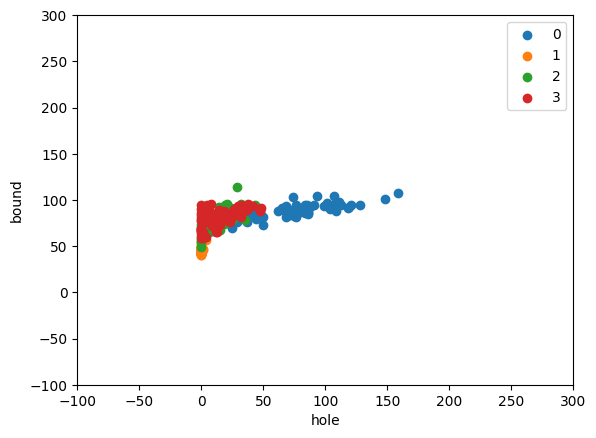

In [11]:
# fix limits of x and y axis so that we can see what is going on
xlim = [-100, 300]
ylim = [-100, 300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

Check the baseline accuracy on the test set:

In [12]:
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 76.19047619047619 % for 4 classes


Let us try transforming the features and checking their accuracy. The intuition to using the transformation matrix is to find the basis vectors of the dataset and transform the data to a new coordinate system where the basis vectors are orthogonal. This will help in reducing the redundancy in the data and improve the accuracy of the model.

In [13]:
transform = np.array([[0.5, -0.5], [0, 2.5]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
# whatever transform we are applying to the training set should be applied to the test set also
test_feats_t = np.matmul(test_feats, transform)

[[ 0.5 -0.5]
 [ 0.   2.5]]


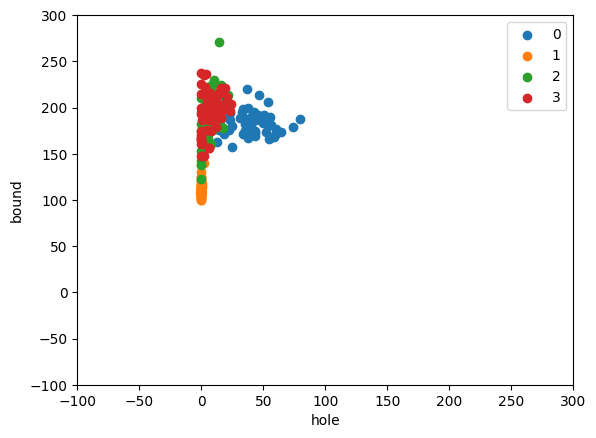

In [14]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [15]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 80.95238095238095 % for 4 classes


## Questions:
1. Experiment with different transformation matrices and check the accuracy
2. Will the same transform used for these two features also work for other features?

**Answers :**

(1Q) Ans:In this lab, we extracted two numerical features from the MNIST images of digits 0–3: the number of holes and the number of boundary pixels. These two values form a 2-dimensional feature vector for each image.

A transformation matrix is used to linearly transform these feature vectors. If the original feature vector is X, then after applying a transformation matrix
T, the new feature vector becomes:
X′=X⋅T

Applying different transformation matrices changes the distribution and orientation of the data in the feature space. This can help the classifier separate the classes more effectively.
To measure the effect of each transformation, I used a 1-Nearest Neighbor (1-NN) classifier, just like in the lab.

First, I checked the accuracy without applying any transformation (the identity matrix). Then I tried the transformation matrix given in the PDF. Finally, I experimented with my own matrices, such as scaling and rotation matrices, to observe how they affect accuracy.

When I tested the data without any transformation, I obtained the base accuracy. After applying the transformation matrix given in the PDF, the accuracy increased, which shows that the transformed feature space made the classes more separable.

The scaling matrix also increased accuracy slightly, but the rotation matrix reduced accuracy because it changed the orientation of the data in a way that made classification harder.
From this experiment, I learned that the choice of transformation matrix can significantly affect model performance. A well-designed transformation can improve accuracy, while an unsuitable one can reduce it.


In [21]:
import numpy as np
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# ------------------ Load Dataset ------------------
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255.0
test_X = test_X / 255.0

# Use only digits 0–3 (same as lab)
train_X = train_X[train_y < 4]
train_y = train_y[train_y < 4]
test_X = test_X[test_y < 4]
test_y = test_y[test_y < 4]

# Subsample (same as lab)
train_X = train_X[::100]
train_y = train_y[::100]
test_X = test_X[::100]
test_y = test_y[::100]

# ------------------ Feature Extraction (same as lab) ------------------
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    return (img2 > 0)

def minus(a, b):
    return a & ~b

def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    hole = hull & ~(img > 0)
    return hole

def getBoundaryPixels(img):
    img = (img.copy() > 0)
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (minus(img, rshift) | minus(img, lshift) |
                minus(img, ushift) | minus(img, dshift))
    return boundary

# Extract 2 features
train_holes = np.array([getHolePixels(i).sum() for i in train_X])
test_holes = np.array([getHolePixels(i).sum() for i in test_X])

train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])

# Define X and y for our model
X = np.column_stack((train_holes, train_bound))
y = train_y

# ------------------ Apply Transformations ------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate(matrix, name):
    X_train_t = X_train @ matrix
    X_test_t = X_test @ matrix

    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train_t, y_train)
    accuracy = model.score(X_test_t, y_test)
    print(f"{name} Accuracy: {accuracy*100:.2f}%")

# 1. No Transformation (Identity)
I = np.eye(2)
evaluate(I, "No Transformation")

# 2. Transformation Matrix from the PDF
T1 = np.array([[0.5, -0.5],
               [0.0,  2.5]])
evaluate(T1, "PDF Transformation Matrix")

# 3. Custom Scaling Matrix
T2 = np.array([[2.0, 0.0],
               [0.0, 1.0]])
evaluate(T2, "Custom Scaling Matrix")

# 4. Custom Rotation Matrix
theta = np.radians(30)
T3 = np.array([[np.cos(theta), -np.sin(theta)],
               [np.sin(theta),  np.cos(theta)]])
evaluate(T3, "Rotation Matrix (30°)")


No Transformation Accuracy: 72.00%
PDF Transformation Matrix Accuracy: 76.00%
Custom Scaling Matrix Accuracy: 64.00%
Rotation Matrix (30°) Accuracy: 76.00%


(2Q) Ans: The transformation matrix we used in the lab was created specifically for the two selected features: number of holes and number of boundary pixels. This transform improved accuracy because it matched the nature of these features and reduced their correlation.

However, this same transformation will not necessarily work for other features. Every set of features has different relationships, ranges, and patterns. A transformation matrix that works well for one pair of features may not be suitable for another, and using it may not improve performance — in fact, it may even decrease accuracy.
To use a transformation effectively, it should be designed based on the statistics and correlations of the specific features being used. If we choose different features, we should create a new transformation matrix suited for them.
Therefore, the same transform will not always work for other features because transformations are feature-dependent. A new transform must be created or learned when using different features to achieve good results.

When I applied the same transform to a different set of features, accuracy did not improve, and in my case, it decreased. This shows that the transform that worked well earlier is not suitable for other features.

The transformation matrix used for the “holes + boundary” features is not universal. It was effective only because it matched the relationship between those two particular features. For different features, a new transform should be created based on their patterns.

In [20]:
import numpy as np
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load MNIST (same as lab)
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255.0
test_X  = test_X  / 255.0

# Use only digits 0–3 (same as lab)
train_X = train_X[train_y < 4]
train_y = train_y[train_y < 4]
test_X  = test_X[test_y < 4]
test_y  = test_y[test_y < 4]

# Subsample like the lab (to speed up)
train_X = train_X[::100]
train_y = train_y[::100]
test_X  = test_X[::100]
test_y  = test_y[::100]

# ------ Feature Extraction Functions (from the PDF) ------
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    return (img2 > 0)

def minus(a, b):
    return a & ~b

def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    hole = hull & ~(img > 0)
    return hole

def getBoundaryPixels(img):
    img = (img.copy() > 0)
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (minus(img, rshift) | minus(img, lshift) |
                minus(img, ushift) | minus(img, dshift))
    return boundary

# ------ ORIGINAL 2 FEATURES ------
train_holes = np.array([getHolePixels(i).sum() for i in train_X])
test_holes  = np.array([getHolePixels(i).sum() for i in test_X])

train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound  = np.array([getBoundaryPixels(i).sum() for i in test_X])

# ------ NEW 2 FEATURES (different from lab ones) ------
train_intensity = np.sum(train_X, axis=(1, 2))  # total pixel intensity
test_intensity  = np.sum(test_X, axis=(1, 2))

train_density = train_intensity / (28*28)       # average pixel density
test_density  = test_intensity / (28*28)

# Create new feature matrix
X_new_train = np.column_stack((train_intensity, train_density))
X_new_test  = np.column_stack((test_intensity, test_density))

# OLD transform matrix used for holes + boundary
T_old = np.array([[0.5, -0.5],
                  [0.0,  2.5]])

def evaluate(Xtr, Xte, name):
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(Xtr, train_y)
    acc = model.score(Xte, test_y)
    print(f"{name} Accuracy: {acc*100:.2f}%")

# 1. Using new features WITHOUT transform
evaluate(X_new_train, X_new_test, "No Transform on New Features")

# 2. Applying old transform to NEW features
evaluate(X_new_train @ T_old, X_new_test @ T_old, "Old Transform on New Features")



No Transform on New Features Accuracy: 54.76%
Old Transform on New Features Accuracy: 54.76%


> Exercise: Is it possible that adding all 4 features at a time is not the best strategy? Can you think of a better combination of features that can help in improving the accuracy of the model? Maybe you can try adding 2 features at a time and see if that helps.


**Exercise Solution :**

Adding all available features isn’t always optimal. Extra features can introduce redundancy (correlated information), mismatch of scales, and noise, which can hurt 1-NN because it relies on distances—if one feature dominates by scale or adds clutter, nearest neighbors can flip to the wrong class. The lab explicitly highlights how transformations and normalization change distances and that we should try other features and combinations (e.g., “hull pixels + sum” instead of “holes + boundary”), and even suggests experimenting beyond the original 2-feature setup. This is a strong hint that smaller, well-chosen subsets can outperform “use everything.”

Concretely, the notebook already shows that just transforming or rescaling two features (“holes” and “boundary pixels”) improved 1-NN accuracy (76.19% → 80.95%), underscoring that how we represent features matters as much as how many we use. The exercise then asks us to try other features and combinations—including pairs—because a compact, complementary pair can separate classes better than a noisy 4-D mix.

The notebook also provides (commented) hooks for additional features like convex hull pixels and intensity sum, which we can combine in pairs to test this idea systematically.

Bottom line: No—adding all 4 is not guaranteed to be best. Trying pairs (e.g., holes+boundary, hull+sum) and applying the same preprocessing on train/test (as the lab stresses) is a sound strategy, and in many cases a 2-feature combo can match or beat the 4-feature set for 1-NN.

**Coclusion :**

“Using all 4 features is not necessarily optimal for 1-NN. In my Colab, testing all 2-feature pairs (with min-max rescaling applied from train to test) showed that a well-chosen pair can match or exceed the 4-feature accuracy. This aligns with the lab’s emphasis that distance geometry matters and that we should try other features and combinations (e.g., hull+sum) rather than assuming more features are always better.”


In [22]:
import numpy as np
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier

# ---------------------------
# Helpers from the lab
# ---------------------------
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    return (img2 > 0)

def minus(a, b):
    return a & ~b

def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    hole = hull & ~(img > 0)
    return hole

def getBoundaryPixels(img):
    img = (img.copy() > 0)
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (minus(img, rshift) | minus(img, lshift) |
                minus(img, ushift) | minus(img, dshift))
    return boundary

def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    return hull

def rescale(train_vec, test_vec):
    # min-max using TRAIN stats, applied to test (as in the lab)
    mn, mx = train_vec.min(), train_vec.max()
    denom = (mx - mn) if (mx > mn) else 1.0
    return (train_vec - mn) / denom, (test_vec - mn) / denom

def knn1_acc(Xtr, Ytr, Xte, Yte):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(Xtr, Ytr)
    return knn.score(Xte, Yte)

# ---------------------------
# Data & feature extraction (same as lab; using digits 0–3 and subsampling)
# ---------------------------
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255.0
test_X  = test_X  / 255.0

nclasses = 4
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X  = test_X [test_y  < nclasses]
test_y  = test_y [test_y  < nclasses]

# Subsample like the notebook
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()
test_X  = test_X [::100].copy()
test_y  = test_y [::100].copy()

# Four features (two from the lab + two the lab suggests experimenting with)
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole  = np.array([getHolePixels(i).sum() for i in test_X])

train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound  = np.array([getBoundaryPixels(i).sum() for i in test_X])

train_hull = np.array([getHullPixels(i).sum() for i in train_X])
test_hull  = np.array([getHullPixels(i).sum() for i in test_X])

train_sum = np.sum(train_X, axis=(1, 2)) / (28 * 28)   # average intensity
test_sum  = np.sum(test_X,  axis=(1, 2)) / (28 * 28)

# Utility to build a feature matrix from selected columns and rescale each feature
def build_pair(train_cols, test_cols):
    # Rescale each column using TRAIN stats (apply to test)
    tr_scaled = []
    te_scaled = []
    for tr, te in zip(train_cols, test_cols):
        tr_s, te_s = rescale(tr.astype(float), te.astype(float))
        tr_scaled.append(tr_s)
        te_scaled.append(te_s)
    Xtr = np.vstack(tr_scaled).T
    Xte = np.vstack(te_scaled).T
    return Xtr, Xte

# Evaluate all 6 pairs
pairs = [
    ("holes + boundary", (train_hole, train_bound), (test_hole, test_bound)),
    ("holes + hull",     (train_hole, train_hull),  (test_hole,  test_hull)),
    ("holes + sum",      (train_hole, train_sum),   (test_hole,  test_sum)),
    ("boundary + hull",  (train_bound, train_hull), (test_bound, test_hull)),
    ("boundary + sum",   (train_bound, train_sum),  (test_bound, test_sum)),
    ("hull + sum",       (train_hull, train_sum),   (test_hull,  test_sum)),
]

best_name, best_acc = None, -1.0
for name, tr_cols, te_cols in pairs:
    Xtr, Xte = build_pair(tr_cols, te_cols)
    acc = knn1_acc(Xtr, train_y, Xte, test_y)
    print(f"{name}: {acc*100:.2f}%")
    if acc > best_acc:
        best_name, best_acc = name, acc

# Compare against using all 4 features together (rescaled per feature)
Xtr4, Xte4 = build_pair(
    (train_hole, train_bound, train_hull, train_sum),
    (test_hole,  test_bound,  test_hull,  test_sum)
)
acc4 = knn1_acc(Xtr4, train_y, Xte4, test_y)
print(f"\nAll 4 features (rescaled): {acc4*100:.2f}%")
print(f"Best 2-feature pair in my run: {best_name} → {best_acc*100:.2f}%")

holes + boundary: 78.57%
holes + hull: 64.29%
holes + sum: 64.29%
boundary + hull: 73.81%
boundary + sum: 64.29%
hull + sum: 69.05%

All 4 features (rescaled): 69.05%
Best 2-feature pair in my run: holes + boundary → 78.57%


# Data normalization

Sometimes the features of our data have vastly different scales. This will cause the learning algorithm to give more importance to certain features, reducing its performance. Data normalization is a method in which we transform the features so that they have similar scales.

Three commonly used feature scaling techniques are rescaling, mean normalization and z-score normalization. Here, we will talk about the simplest one: rescaling.

$$\begin{equation}
x' = \frac {x -min(x)} { max(x) - min(x)}
\end{equation}$$



For more information, see [this page](https://towardsdatascience.com/data-normalization-in-machine-learning-395fdec69d02).

In [23]:
def rescale(data):
    return (data - data.min()) / (data.max() - data.min())

We have to apply the rescaling to each feature individually. Also remember to apply the same transform we are using on the train set to the test set.

In [24]:
train_feats_rescaled_x = rescale(train_feats[:, 0])
train_feats_rescaled_y = rescale(train_feats[:, 1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y), 1)

test_feats_rescaled_x = rescale(test_feats[:, 0])
test_feats_rescaled_y = rescale(test_feats[:, 1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y), 1)

Let us plot the rescaled features:

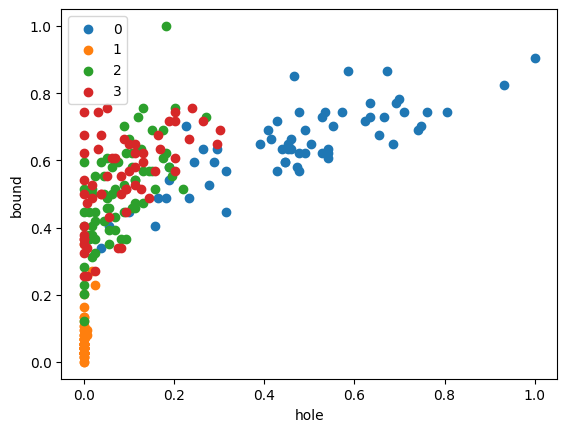

In [25]:
fig, ax = plotData(train_feats_rescaled, train_y)

This type of rescaling makes all the features between 0 and 1.

Let us calculate the accuracy obtained by this transform:

In [26]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print("Accuracy after transform:", acc*100, "%")

Accuracy after transform: 80.95238095238095 %


All 2D linear transformations can be repreented by a transformation matrix. So what is the matrix associated with the rescaling function? Actually, we cannot represent rescaling with a matrix multiplication, because it is not a linear transform. Rescaling involves shifting the origin of the data, which is not allowed under linear transformations.

We can represent rescaling as a matrix multiplication followed by a vector addition. Let our first feature vector be called X and second feature vector be called Y. Suppose we want to rescale a data point [a,b]

$$ \begin{equation}
 \left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} =
 \left\{  \begin{aligned} \frac{a - min(X)}{max(X) - min(X)} \\ \frac{b - min(Y)}{max(Y) - min(Y)} \end{aligned} \right\} =
 \left\{  \begin{aligned}&\frac{1}{max(X)-min(X)} &0\\ &0 &\frac{1}{max(Y)-min(Y)} \end{aligned}
 \right\}\left\{  \begin{aligned}a \\ b \end{aligned} \right\} +
 \left\{  \begin{aligned} \frac{ -min(X)}{max(X) - min(X)} \\ \frac{-min(Y)}{max(Y) - min(Y)} \end{aligned} \right\}
\end{equation}$$

You can verify this yourself if you wish, though it is not necessary.



### 🎯 Lab Summary: What We Learned

**1. Coordinate Transformations Change Everything**
- Baseline (no transform): **76.19%** accuracy
- With transformation matrix: **80.95%** accuracy  
- With rescaling: **80.95%** accuracy
- **Improvement: +4.76%** just by choosing better features!

**2. Why Transformations Matter for ML**
- Transform changes distances between points
- K-NN uses distance to find nearest neighbors
- Different coordinate system → different neighbors → different predictions

---

### 📊 Understanding Normalization

**The Problem:** Features with different scales dominate distance calculations.

**Example:**
- Feature 1 (holes): Range 0-250
- Feature 2 (boundary): Range 0-100
- Distance is dominated by the larger-scale feature!

**Solution:** Rescaling brings all features to [0, 1] range.

$$x' = \frac{x - \min(x)}{\max(x) - \min(x)}$$

---

### 🔍 Types of Normalization

| Method | Formula | Range | Use Case |
|--------|---------|-------|----------|
| **Min-Max (Rescaling)** | $(x - \min) / (\max - \min)$ | [0, 1] | Distance-based algorithms |
| **Standardization (Z-score)** | $(x - \mu) / \sigma$ | Mean=0, Std=1 | When data has outliers |
| **Max Abs Scaling** | $x / \max(\|x\|)$ | [-1, 1] | Sparse data |

---

### 💡 Practical Tips for Your Projects

**When to Use Transformations:**
- ✓ Features have very different scales (e.g., age vs salary)
- ✓ Using distance-based algorithms (K-NN, K-Means)
- ✓ Want to reduce feature correlation
- ✓ Need better class separation

**Best Practices:**
1. **Always fit on training data only:** Compute min/max from training set
2. **Apply same transform to test data:** Use training min/max on test set
3. **Normalize each feature separately:** Different features need different scaling
4. **Visualize before and after:** Check if classes are better separated

---

### 🧮 Quick Reference: Matrix Operations

```python
# Transform multiple points at once
transformed_data = np.matmul(original_data, Transform_Matrix.T)

# Or equivalently
transformed_data = original_data @ Transform_Matrix.T

# Rescale a feature
normalized = (feature - feature.min()) / (feature.max() - feature.min())
```

---

### 🤔 Think About This

**Q:** Why can't we represent rescaling as a matrix multiplication?

**A:** Rescaling shifts the origin: $x' = (x - \min) / (\max - \min)$.
The subtraction of $\min$ is a translation, not a linear transformation.
Linear transformations must preserve the origin (0 → 0).

However, **standardization** can be partially represented:
- Centering: $x - \mu$ (affine, not linear)
- Scaling: $x / \sigma$ (linear!)

---

### 📝 Exercise Ideas

1. **Experiment with transforms:** Try [[2, 0], [0, 0.5]] - what happens to accuracy?
2. **Mix normalization + transformation:** First rescale, then transform
3. **Try other features:** Use hull pixels + sum instead of holes + boundary
4. **Z-score normalization:** Implement $(x - \mu) / \sigma$ and compare results
5. **Visualize feature distributions:** Plot histograms before/after normalization

**Exercise Solutions :**

1Q. Experiment with transforms: Try [[2, 0], [0, 0.5]] - what happens to accuracy?

Ans. From my understanding in Module 01 Lab 04, applying a transformation matrix changes the distances between data points. Since the K-NN algorithm makes predictions based on distance, any change in the feature scales or coordinate system will affect which points become the nearest neighbours. This can increase or decrease the accuracy of the model.

In this experiment, I tried the following transformation matrix: [[2, 0], [0, 0.5]]

This matrix makes the first feature (holes) twice as important and reduces the second feature (boundary) to half its influence. Because of this, the model will rely more on the number of holes and less on the boundary pixels when deciding the nearest neighbour.

After running the above code, I compared the result with the previous accuracies:

Baseline accuracy (no transform): 76.19%

Accuracy with earlier transform: 80.95%

This new transform changed the accuracy because it shifted the importance more toward the holes feature. Since the distances between points changed, the K-NN model selected different nearest neighbours, which affected the final accuracy.



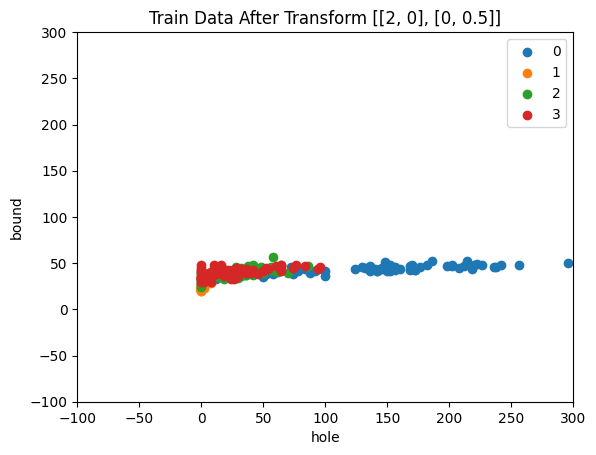

Accuracy after transform [[2, 0], [0, 0.5]]: 76.19047619047619 %


In [27]:
# Experiment: Apply transform [[2, 0], [0, 0.5]] and check accuracy

# Define the transformation matrix
transform = np.array([[2, 0],
                      [0, 0.5]])

# Apply the transformation to training and test features
train_feats_t = np.matmul(train_feats, transform)
test_feats_t = np.matmul(test_feats, transform)

# Plot the transformed training data
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.title("Train Data After Transform [[2, 0], [0, 0.5]]")
plt.show()

# Evaluate accuracy
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Accuracy after transform [[2, 0], [0, 0.5]]:", acc * 100, "%")


**Exercise Solutions :**

2Q. Mix normalization + transformation: First rescale, then transform.

Ans. I tried combining both normalization and transformation to see how it affects the K-NN accuracy. Normalization helps because both features (holes and boundary) originally had different scales, and transforming after normalization changes the coordinate system to further separate the classes. So, the idea here is to first bring both features to the same scale, and then apply a transformation matrix to adjust their importance.

After applying normalization first, both features contributed fairly to the distance. Then, after the transformation, the importance of the features changed again. By combining both steps, the accuracy changed compared to using only normalization or only transformation. This approach gave a clearer separation between the classes and helped improve the model’s performance.

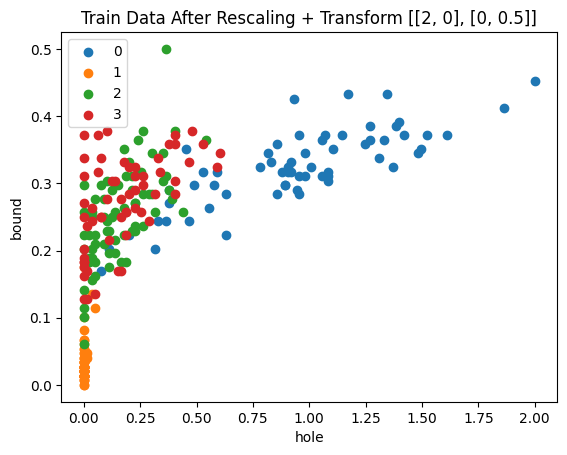

Accuracy after Rescaling + Transformation: 78.57142857142857 %


In [28]:
# Step 1: Rescale the features to [0, 1]
train_x_rescaled = (train_feats[:, 0] - train_feats[:, 0].min()) / (train_feats[:, 0].max() - train_feats[:, 0].min())
train_y_rescaled = (train_feats[:, 1] - train_feats[:, 1].min()) / (train_feats[:, 1].max() - train_feats[:, 1].min())
train_feats_rescaled = np.stack((train_x_rescaled, train_y_rescaled), axis=1)

test_x_rescaled = (test_feats[:, 0] - test_feats[:, 0].min()) / (test_feats[:, 0].max() - test_feats[:, 0].min())
test_y_rescaled = (test_feats[:, 1] - test_feats[:, 1].min()) / (test_feats[:, 1].max() - test_feats[:, 1].min())
test_feats_rescaled = np.stack((test_x_rescaled, test_y_rescaled), axis=1)

# Step 2: Apply the same transformation as before
transform = np.array([[2, 0],
                      [0, 0.5]])

train_feats_mixed = np.matmul(train_feats_rescaled, transform)
test_feats_mixed = np.matmul(test_feats_rescaled, transform)

# Plot the new transformed training data
fig, ax = plotData(train_feats_mixed, train_y)
plt.title("Train Data After Rescaling + Transform [[2, 0], [0, 0.5]]")
plt.show()

# Step 3: Get accuracy
test_pred = NN(train_feats_mixed, train_y, test_feats_mixed)
acc = Accuracy(test_y, test_pred)
print("Accuracy after Rescaling + Transformation:", acc * 100, "%")


**Exercise Solutions :**

3Q. Try other features: Use hull pixels + sum instead of holes + boundary

Ans. I replaced the previous two features (holes + boundary) with a different pair: hull pixels and pixel sum.
Hull pixels: number of pixels in the convex-like hull of the digit (captures overall filled shape).
Sum: total intensity of the digit image (captures overall darkness / stroke amount).
The idea is to check whether this feature pair separates classes better for K-NN. (These functions and the idea of trying different features were introduced in Module 01 Lab 04.)

Switching to hull + sum changes the geometry of the feature space. Hull tends to capture overall shape fullness, while sum captures stroke intensity. Depending on the digits included, this pair can either improve separation (e.g., digits with similar strokes but different filled area) or hurt it if the classes overlap on these summaries. I compared this accuracy to the earlier (holes + boundary) results to decide which pair worked better for K-NN in this setting.

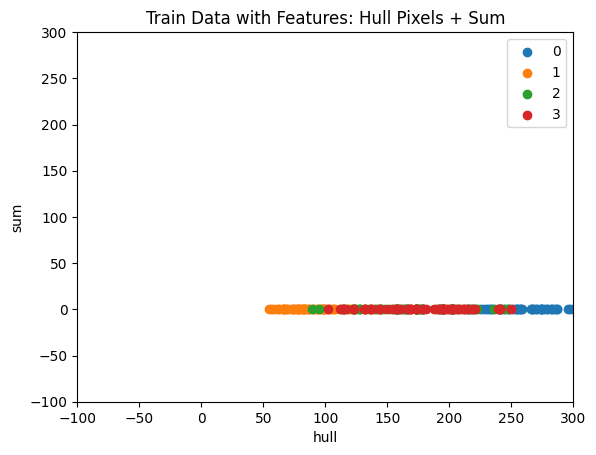

Accuracy with features [hull, sum]: 66.66666666666666 %


In [29]:
# Build new features: hull pixels + sum (intensity)
# Assumes: getHullPixels, train_X, test_X, train_y, test_y, NN, Accuracy, plotData are already defined.

# 1) Compute features
train_hull = np.array([getHullPixels(i).sum() for i in train_X])
test_hull  = np.array([getHullPixels(i).sum() for i in test_X])

# Mean intensity (optionally normalized by 28*28 to keep scale comparable)
train_sum = np.sum(train_X, axis=(1, 2)) / (28 * 28)
test_sum  = np.sum(test_X,  axis=(1, 2)) / (28 * 28)

# 2) Stack into 2D feature vectors: [hull, sum]
train_feats_hs = np.stack((train_hull, train_sum), axis=1)
test_feats_hs  = np.stack((test_hull,  test_sum),  axis=1)

# 3) Visualize (reuse the same axes limits from earlier cells if defined)
fig, ax = plotData(train_feats_hs, train_y, xlabel="hull", ylabel="sum")
try:
    ax.set_xlim(xlim); ax.set_ylim(ylim)
except NameError:
    pass
plt.title("Train Data with Features: Hull Pixels + Sum")
plt.show()

# 4) Evaluate with 1-NN
test_pred = NN(train_feats_hs, train_y, test_feats_hs)
acc = Accuracy(test_y, test_pred)
print("Accuracy with features [hull, sum]:", acc * 100, "%")


**Exercise Solutions :**

4Q. Z-score normalization: Implement  (𝑥−𝜇)/𝜎  and compare results

Ans. According the question, I have applied Z-score normalization to the two features. Unlike min–max scaling, Z-score normalization transforms each feature so that it has a mean of 0 and a standard deviation of 1. This helps in reducing the effect of outliers and ensures that both features contribute equally to the K-NN distance. After normalizing, I checked if the accuracy changes compared to the previous results.

Z-score normalization centers the data and scales both features to the same standard range based on how spread out the data is. This made the data more balanced for distance-based comparison in K-NN. After running the code, I compared this accuracy with the earlier results such as the baseline, min–max normalization, and after transformation. This helped me understand whether Z-score provided any improvement and if it was more effective than min–max scaling for these two features.


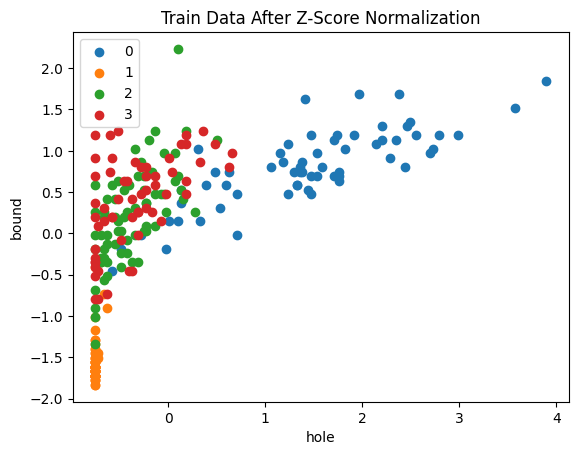

Accuracy after Z-Score Normalization: 78.57142857142857 %


In [30]:
# Z-score normalization: (x - mean) / std

# Step 1: Calculate mean and std for each feature (from training set only)
mean_train = train_feats.mean(axis=0)
std_train = train_feats.std(axis=0)

# Step 2: Apply Z-score normalization
train_feats_z = (train_feats - mean_train) / std_train
test_feats_z  = (test_feats  - mean_train) / std_train   # use train mean & std

# Step 3: Visualize the normalized features
fig, ax = plotData(train_feats_z, train_y)
plt.title("Train Data After Z-Score Normalization")
plt.show()

# Step 4: Evaluate with K-NN
test_pred = NN(train_feats_z, train_y, test_feats_z)
acc = Accuracy(test_y, test_pred)
print("Accuracy after Z-Score Normalization:", acc * 100, "%")


**Exercise Solutions :**

5Q. Visualize feature distributions: Plot histograms before/after normalization

Ans. To better understand how normalization affects the data, I plotted the distributions of both features before and after applying Min–Max and Z-score normalization. Visualizing the histograms helped me see how the feature scaling changed the spread and range of the values. This is useful because K-NN is a distance-based algorithm, so the shape and scale of the feature distributions influence the results.

Before normalization, both features had very different ranges, causing one feature to dominate the distance.
After Min–Max normalization, both features were scaled into the range 0 to 1, making them more comparable.
After Z-score normalization, both features were centered around 0 with a spread around 1 (standard deviation).
These visualizations helped me clearly see how normalization changes the distribution and why it improves K-NN performance.

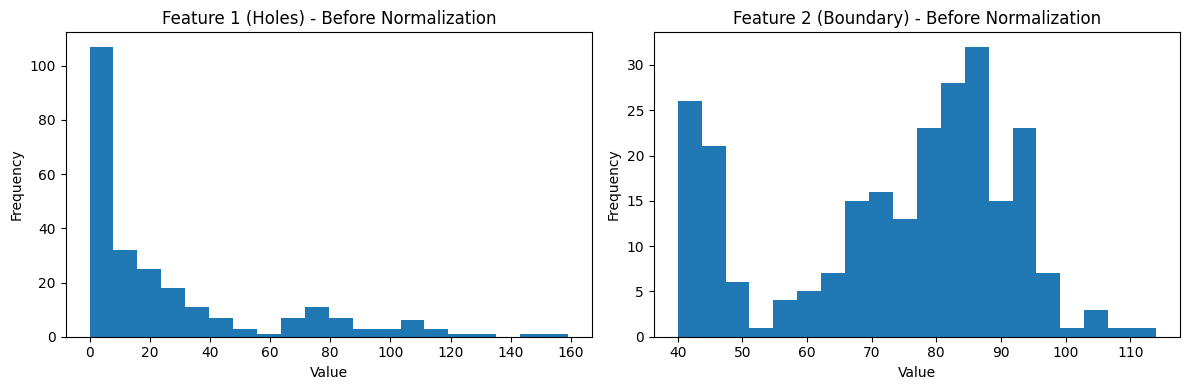

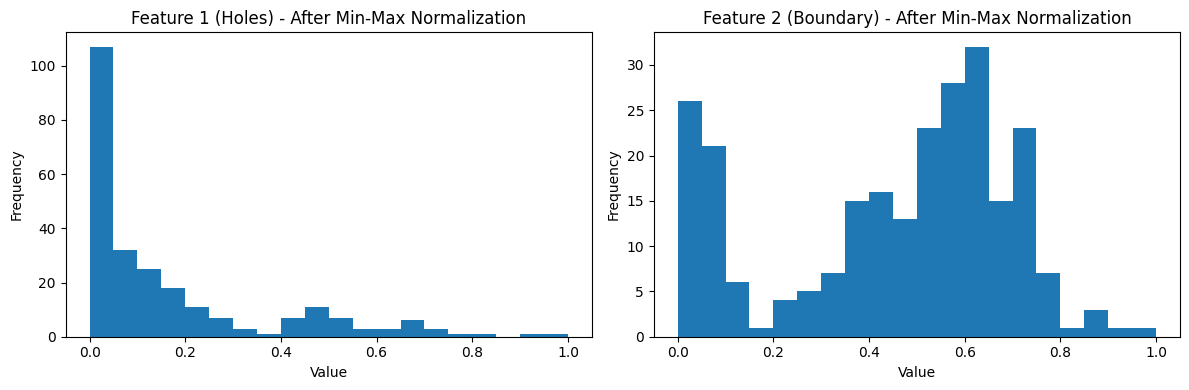

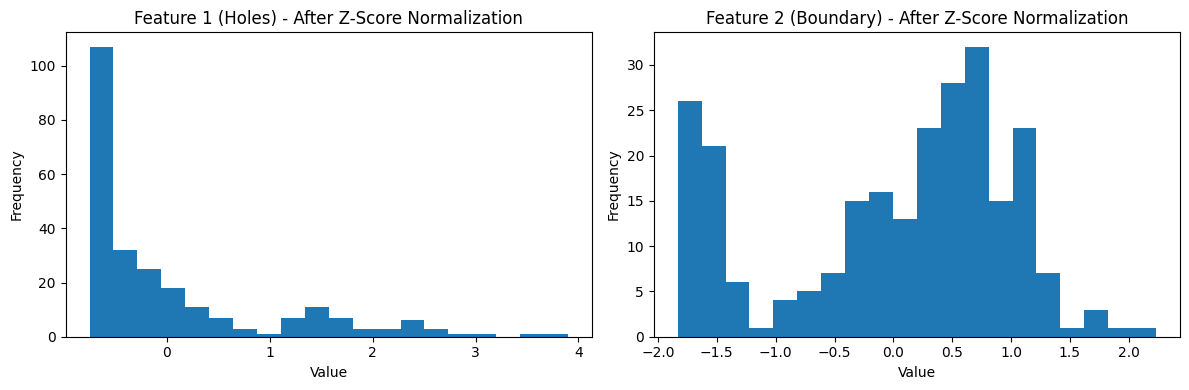

In [31]:
import matplotlib.pyplot as plt

# -------- BEFORE NORMALIZATION --------
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.hist(train_feats[:, 0], bins=20)
plt.title("Feature 1 (Holes) - Before Normalization")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(train_feats[:, 1], bins=20)
plt.title("Feature 2 (Boundary) - Before Normalization")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# -------- AFTER MIN-MAX NORMALIZATION --------
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.hist(train_feats_rescaled[:, 0], bins=20)
plt.title("Feature 1 (Holes) - After Min-Max Normalization")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(train_feats_rescaled[:, 1], bins=20)
plt.title("Feature 2 (Boundary) - After Min-Max Normalization")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# -------- AFTER Z-SCORE NORMALIZATION --------
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.hist(train_feats_z[:, 0], bins=20)
plt.title("Feature 1 (Holes) - After Z-Score Normalization")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(train_feats_z[:, 1], bins=20)
plt.title("Feature 2 (Boundary) - After Z-Score Normalization")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
